In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [4]:
# Load the dataset
file_path ='Depression Student Dataset.csv'
data = pd.read_csv(file_path)

# Basic summary statistics
print("Summary Statistics:")
print(data.describe(include='all'))

Summary Statistics:
       Gender         Age  Academic Pressure  Study Satisfaction  \
count     502  502.000000         502.000000          502.000000   
unique      2         NaN                NaN                 NaN   
top      Male         NaN                NaN                 NaN   
freq      267         NaN                NaN                 NaN   
mean      NaN   26.241036           3.003984            3.075697   
std       NaN    4.896501           1.390007            1.373490   
min       NaN   18.000000           1.000000            1.000000   
25%       NaN   22.000000           2.000000            2.000000   
50%       NaN   26.500000           3.000000            3.000000   
75%       NaN   30.000000           4.000000            4.000000   
max       NaN   34.000000           5.000000            5.000000   

       Sleep Duration Dietary Habits Have you ever had suicidal thoughts ?  \
count             502            502                                   502   
unique 

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


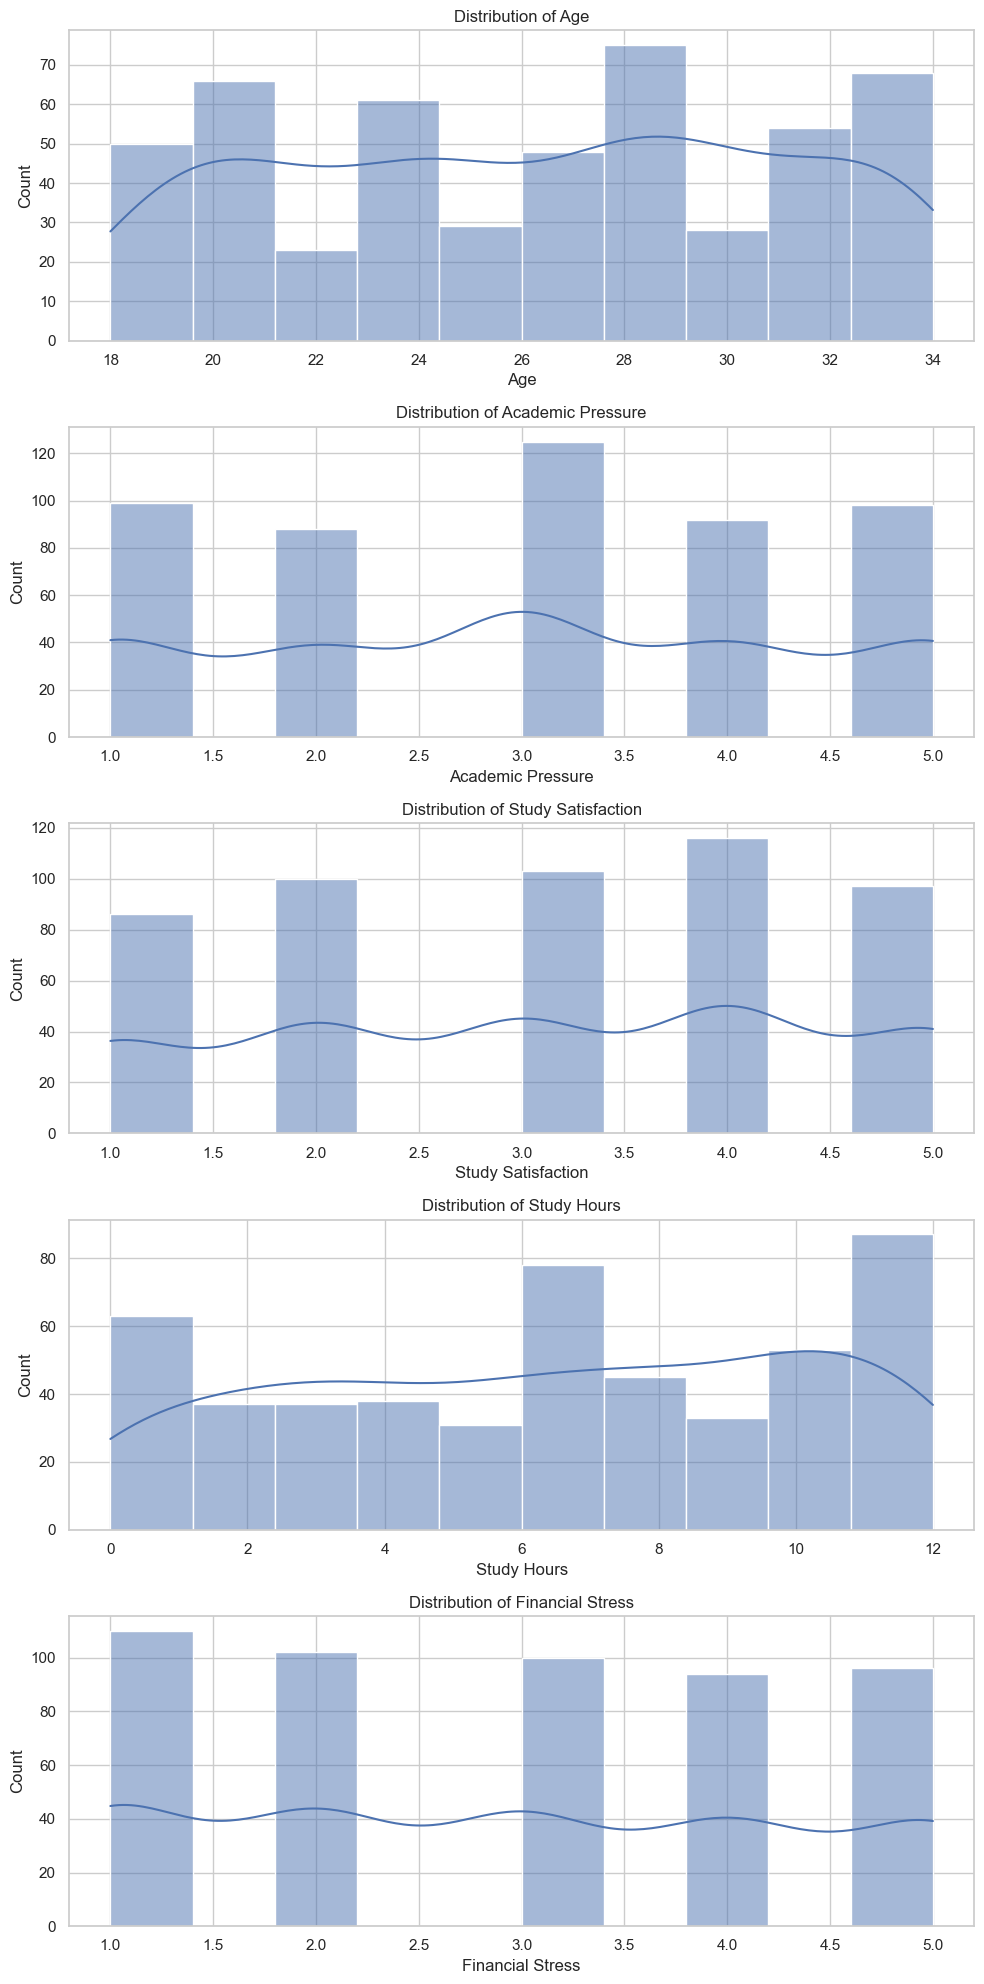

In [6]:
# Set plot aesthetics
sns.set(style="whitegrid")

# Identify numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions for numeric columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, len(numeric_cols) * 4))
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

C:\Users\LMS Traders\AppData\Local\Temp\ipykernel_31572\3254094370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], palette='Set2', order=data[col].value_counts().index)
C:\Users\LMS Traders\AppData\Local\Temp\ipykernel_31572\3254094370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], palette='Set2', order=data[col].value_counts().index)
C:\Users\LMS Traders\AppData\Local\Temp\ipykernel_31572\3254094370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col

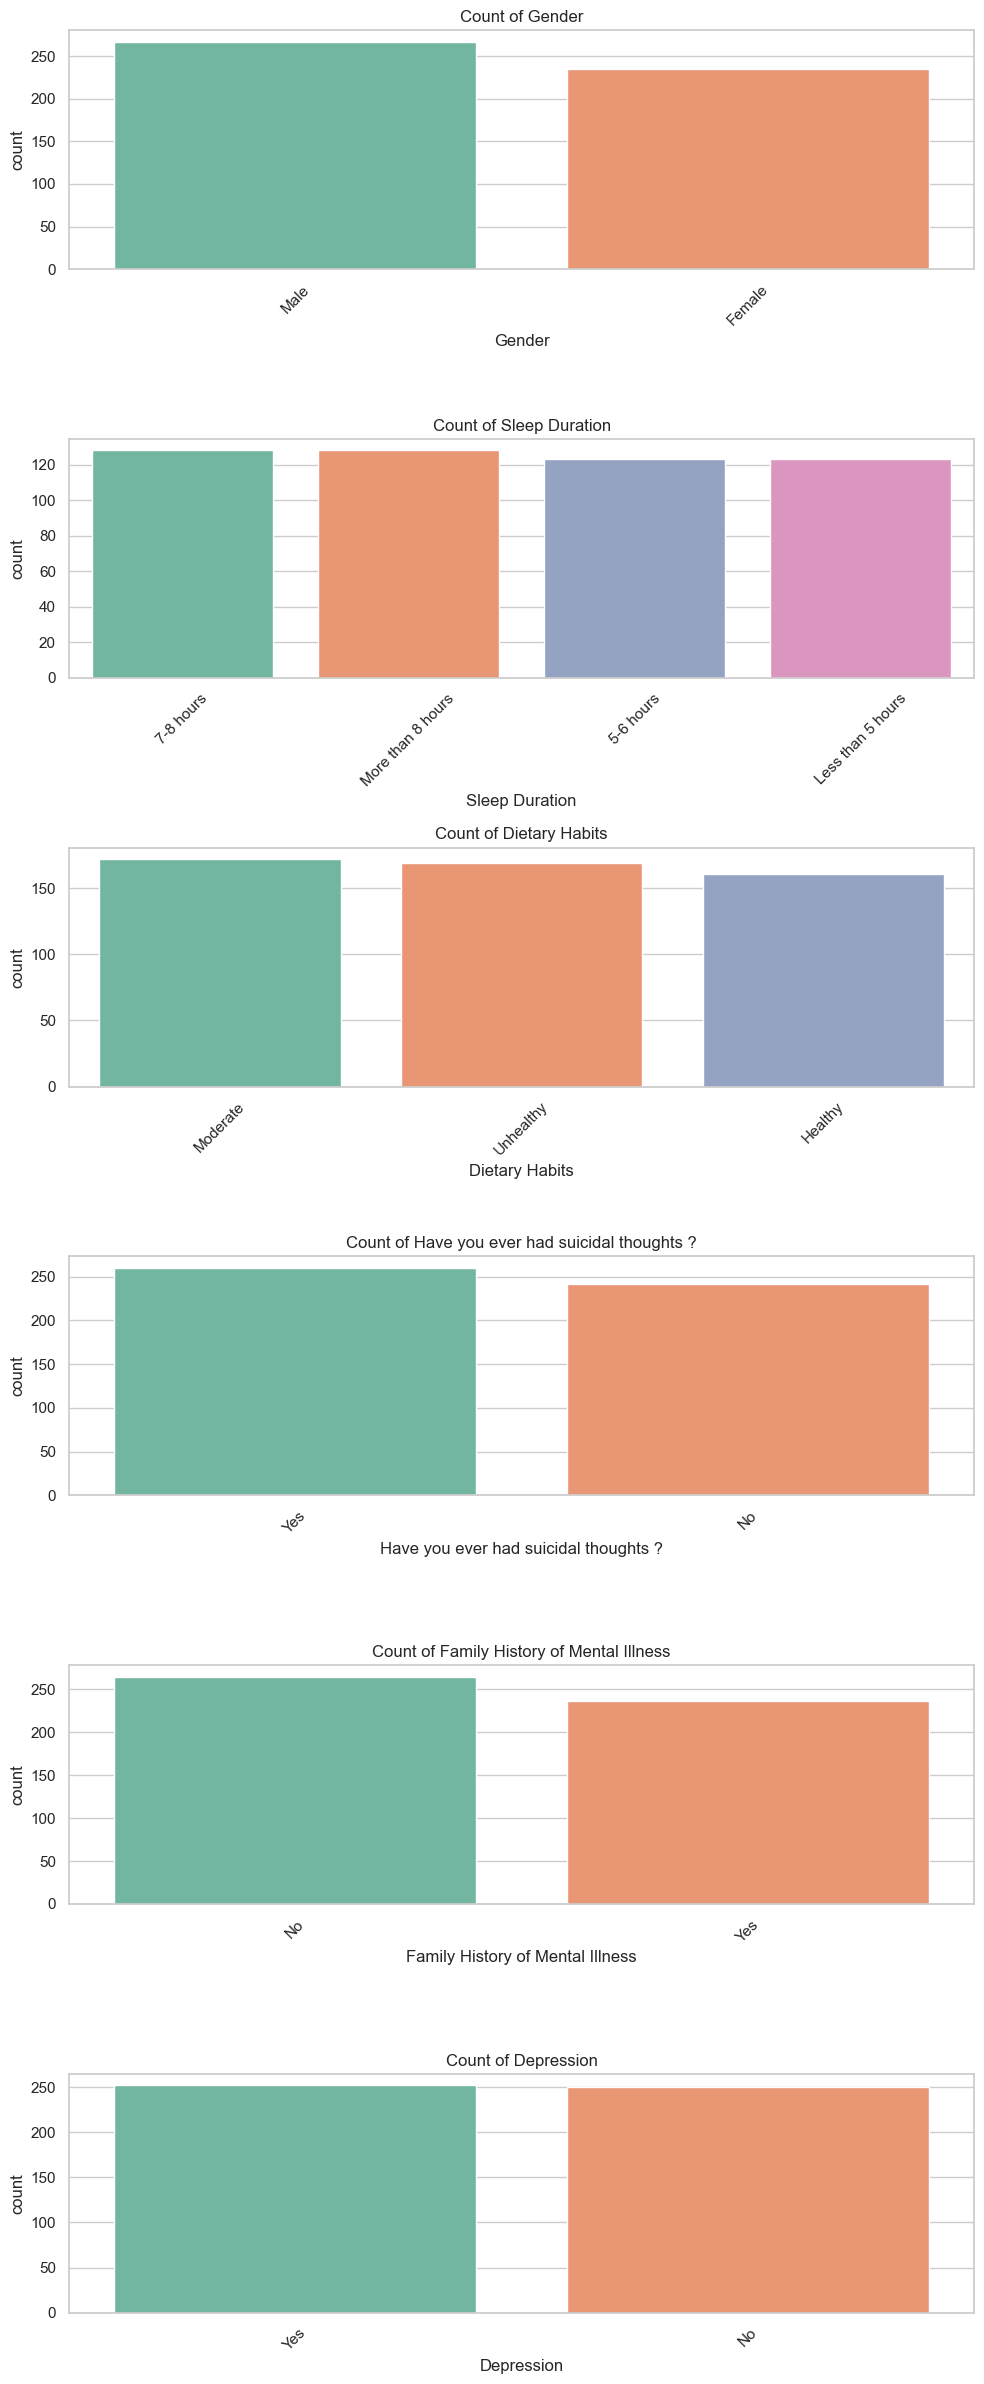

In [7]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Plot count plots for categorical columns
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i], palette='Set2', order=data[col].value_counts().index)
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

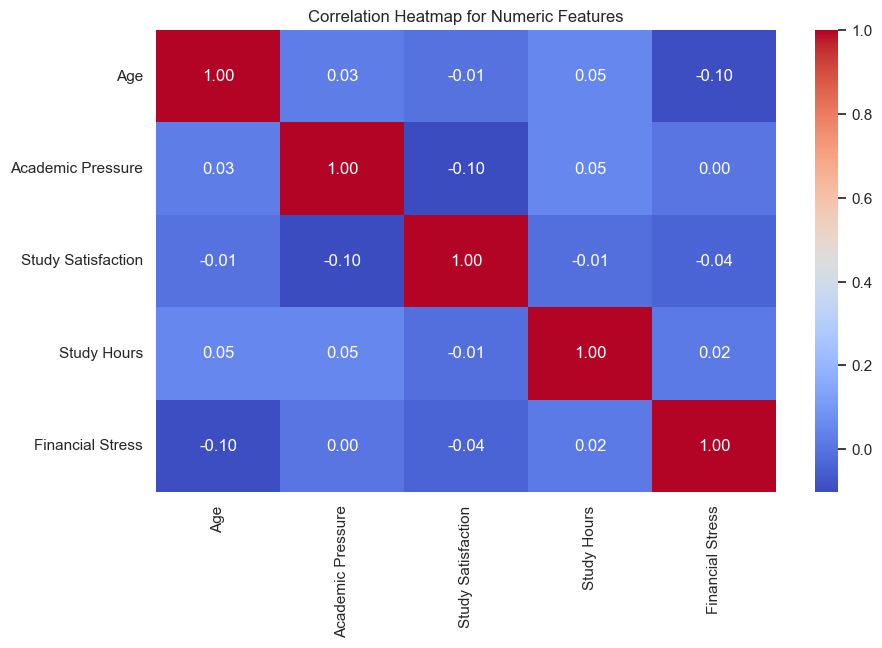

In [11]:
# Compute the correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

In [12]:
# Creating a copy of the dataset for encoding
encoded_data = data.copy()

# Using LabelEncoder for binary or ordinal categories
label_cols = ['Gender', 'Have you ever had suicidal thoughts ?', 
              'Family History of Mental Illness', 'Depression','Sleep Duration', 'Dietary Habits']

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(encoded_data[col])

# Display the transformed dataset
data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,1,1,1,9,2,1,0
1,1,28,4.0,5.0,0,0,1,7,1,1,0
2,1,25,1.0,3.0,0,2,1,10,4,0,1
3,1,23,1.0,4.0,3,2,1,7,2,1,0
4,0,31,1.0,5.0,3,0,1,4,2,1,0


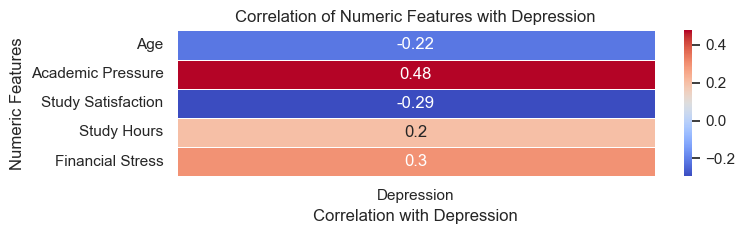

In [14]:

# Select numeric columns
numeric_cols = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

# Calculate correlations
correlations = data[numeric_cols + ['Depression']].corr()

# Extract correlations with the target variable
correlation_with_target = correlations[['Depression']].drop(index='Depression')

# Plot a heatmap
plt.figure(figsize=(8, len(numeric_cols) * 0.5))
sns.heatmap(correlation_with_target, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation of Numeric Features with Depression")
plt.xlabel("Correlation with Depression")
plt.ylabel("Numeric Features")
plt.tight_layout()
plt.show()

In [15]:
### 1. Detect Outliers Using IQR Method ###
def detect_outliers_iqr(df, columns):
    outliers_dict = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = {
            'outliers': outliers,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
        }
        print(f"Column: {column}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Outliers in {column}: {len(outliers)} rows")
    return outliers_dict

# Detect outliers for all numeric columns
iqr_outliers = detect_outliers_iqr(data, numeric_cols)

Column: Age, Lower Bound: 10.0, Upper Bound: 42.0
Outliers in Age: 0 rows
Column: Academic Pressure, Lower Bound: -1.0, Upper Bound: 7.0
Outliers in Academic Pressure: 0 rows
Column: Study Satisfaction, Lower Bound: -1.0, Upper Bound: 7.0
Outliers in Study Satisfaction: 0 rows
Column: Study Hours, Lower Bound: -7.5, Upper Bound: 20.5
Outliers in Study Hours: 0 rows
Column: Financial Stress, Lower Bound: -1.0, Upper Bound: 7.0
Outliers in Financial Stress: 0 rows


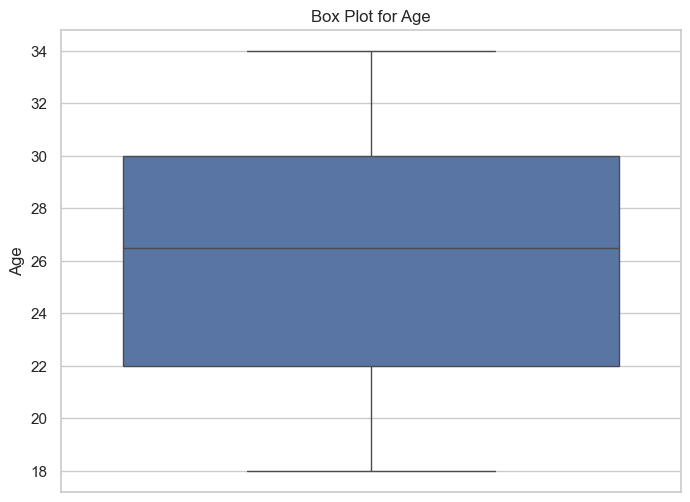

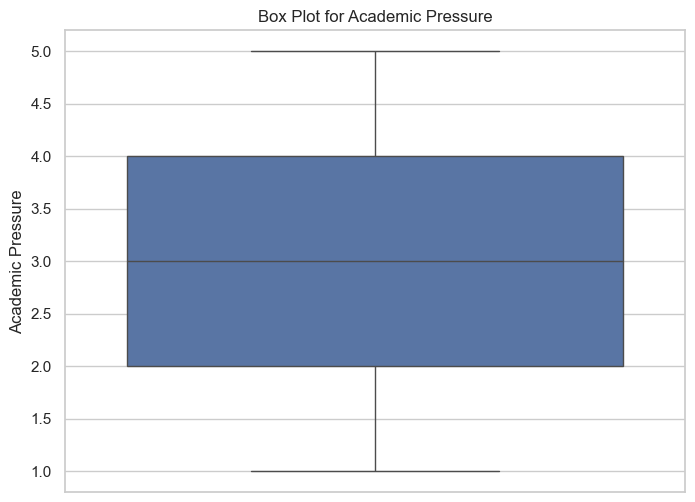

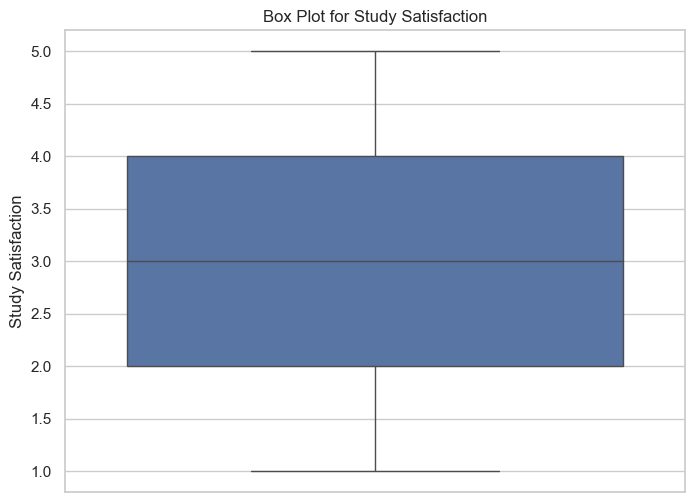

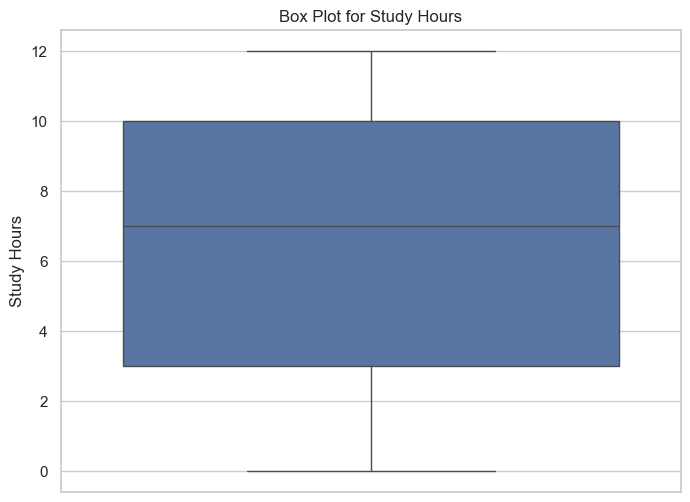

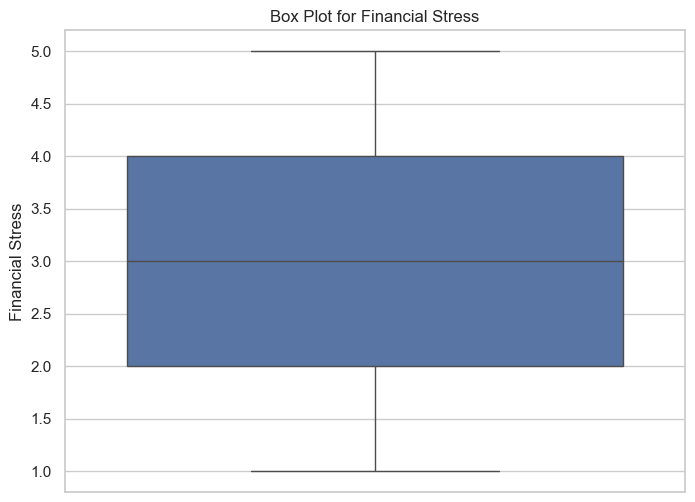

In [16]:
for column in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=column)
    plt.title(f'Box Plot for {column}')
plt.show()

In [20]:
# Define features and target
X = data.drop(columns=['Depression'])# Features
y = data['Depression']# Target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Predict with Decision Tree
dt_pred = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
report = classification_report(y_test, dt_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Decision Tree Classification Report in Tabular Form:")
print(report_df)

Decision Tree Accuracy: 0.88
Decision Tree Classification Report in Tabular Form:
              precision    recall  f1-score     support
0              0.891304  0.854167  0.872340   48.000000
1              0.872727  0.905660  0.888889   53.000000
accuracy       0.881188  0.881188  0.881188    0.881188
macro avg      0.882016  0.879914  0.880615  101.000000
weighted avg   0.881556  0.881188  0.881024  101.000000


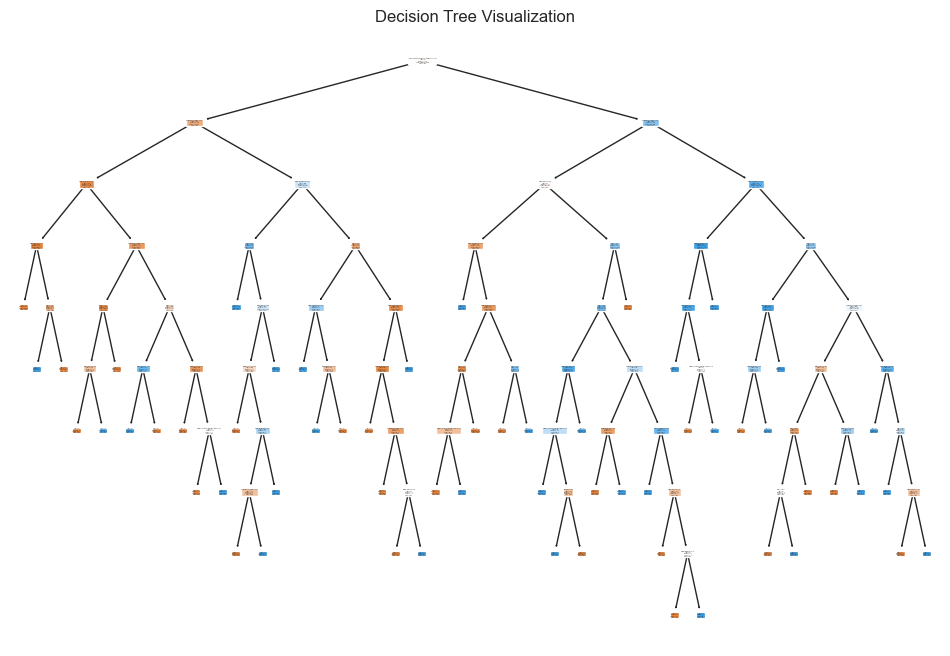

In [31]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

KNN Accuracy: 0.76
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74        48
           1       0.76      0.79      0.78        53

    accuracy                           0.76       101
   macro avg       0.76      0.76      0.76       101
weighted avg       0.76      0.76      0.76       101



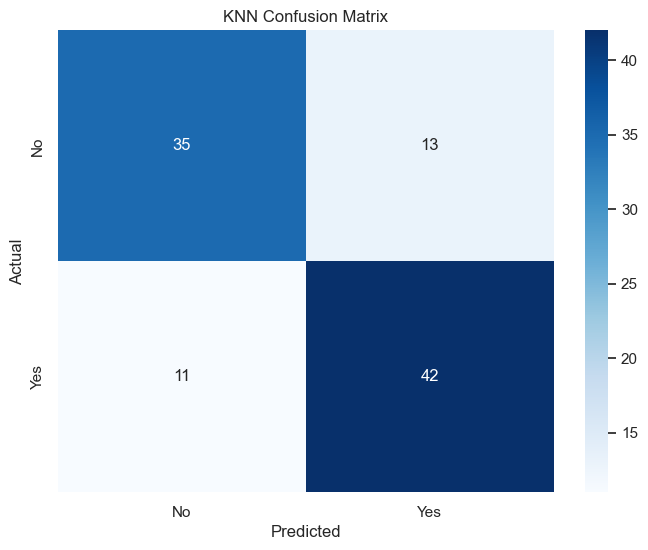

In [32]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
knn_model.fit(X_train, y_train)

# Predict with KNN
knn_pred = knn_model.predict(X_test)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))

# Confusion Matrix for KNN
conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

In [33]:
# Train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9306930693069307
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92        48
           1       0.90      0.98      0.94        53

    accuracy                           0.93       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.93      0.93      0.93       101

